In [220]:
import pandas as pd
import numpy as np

In [221]:
dataset = pd.read_csv(r'C:\Users\Nikki\Downloads\UNSW_Dataset1.csv')

In [224]:
dataset.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [268]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
dataset["attack_cat"]=lb.fit_transform(dataset["attack_cat"])
dataset["proto"]=lb.fit_transform(dataset["proto"])
dataset["service"]=lb.fit_transform(dataset["service"])
dataset["state"]=lb.fit_transform(dataset["state"])

In [269]:
X = dataset.iloc[:, 0:43].values
y = dataset.iloc[:, 43].values

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [271]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [282]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [283]:
y_pred=y_pred.astype(int)
y_pred

array([4, 5, 6, ..., 2, 2, 0])

In [284]:
y_test

array([3, 5, 6, ..., 1, 0, 0], dtype=int64)

<AxesSubplot:>

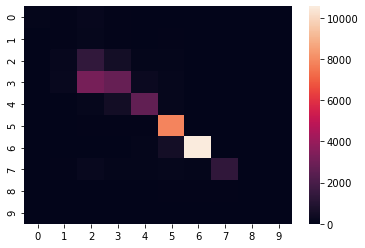

In [285]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns 
sns.heatmap(cm)

In [286]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   90    47   195    66    11     7     1     0     0     0]
 [   24    50   130    66    21    46    13     0     0     0]
 [   40   198  1394   560    97    94    21     2     1     0]
 [   33   216  3187  2780   317   159    38     5     2     0]
 [   19    35   152   533  2668   138    16     4     2     0]
 [    1     6    55    59    42  7858     1     1     0     0]
 [    0     0     8    25    97   558 10557     1     0     0]
 [    2    62   207   110   123   131    93  1347     0     0]
 [    0     0     0    13    39    49    50    58    14     0]
 [    0     0     1     5     1     4     4     9     0     0]]
              precision    recall  f1-score   support

           0       0.43      0.22      0.29       417
           1       0.08      0.14      0.10       350
           2       0.26      0.58      0.36      2407
           3       0.66      0.41      0.51      6737
           4       0.78      0.75      0.76      3567
           5       0.87      0.98      0.92 

C:\Users\Nikki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.tree import export_graphviz
import pydot

In [38]:
tree = regressor.estimators_[5]

In [45]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(dataset.columns[0:40]), rounded = True, precision = 1)

In [46]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [47]:
graph.write_png('tree.png')